In [3]:
# This is query for the Gini Coefficient template
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [4]:
# Path for all the results
path="/mnt/indexer-build/migrated_data/curated/SSC/"
path2="/mnt/indexer-build/migrated_data/curated/entity/"

In [5]:
def extractorYear(year):
    return(int(str(year)[:4]))

def extractorWeek(year):
    return(int(str(year)[4:]))

In [6]:
all_files = glob.glob(path + "/*/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [7]:
all_files2 = glob.glob(path2 + "/*/*.csv")

li2 = []

for filename1 in all_files2:
    df2 = pd.read_csv(filename1, index_col=None, header=0)
    li2.append(df2)

frame2 = pd.concat(li2, axis=0, ignore_index=True)

In [8]:
frame = pd.merge(frame2, frame, on=["time_week"])

In [9]:
frame["year"]=frame.time_week.apply(extractorYear)
frame["week"]=frame.time_week.apply(extractorWeek)
final1 = frame.sort_values(by=['year','week'])

In [10]:
extra = final1[((final1.year == 2018) & (final1.week < 26)) | ((final1.year == 2022) & (final1.week > 34))]

In [11]:
df = pd.merge(final1, extra, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [12]:
df

,max_count_entity,avg_address_per_entity,total_labels,time_week,Total_Vertices_x,max_count,Total_Vertices_y,year,week
1,4,1.307692,26,201826,34,1,34,2018,26
2,644,4.198068,414,201827,1738,30,1738,2018,27
3,611,5.552995,217,201828,1205,12,1205,2018,28
4,883,7.511236,178,201829,1337,6,1337,2018,29
5,385,4.224242,165,201830,697,3,697,2018,30
...,...,...,...,...,...,...,...,...,...
210,55635,37.675292,3594,202230,135405,2421,135405,2022,30
211,55697,33.596563,3899,202231,130993,2005,130993,2022,31
212,55856,36.396518,3561,202232,129608,1720,129608,2022,32
213,55891,26.625762,4922,202233,131052,2207,131052,2022,33


In [13]:
df["entity_ratio"] = (df.max_count_entity / df.Total_Vertices_x) * 100
df["SSC_ratio"] = (df.max_count / df.Total_Vertices_x) * 100

<AxesSubplot: xlabel='date'>

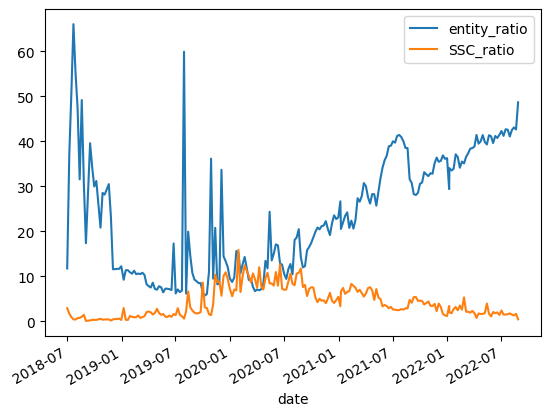

In [14]:
# Determine the date
df['date'] = pd.to_datetime(df.assign(day=1, month=1)[['year', 'month', 'day']])+pd.to_timedelta(df.week*7, unit='days')

# Plot
fig, ax = plt.subplots()
df.plot(x='date', y='entity_ratio', ax=ax)
df.plot(x='date', y='SSC_ratio', ax=ax)

<AxesSubplot: xlabel='date'>

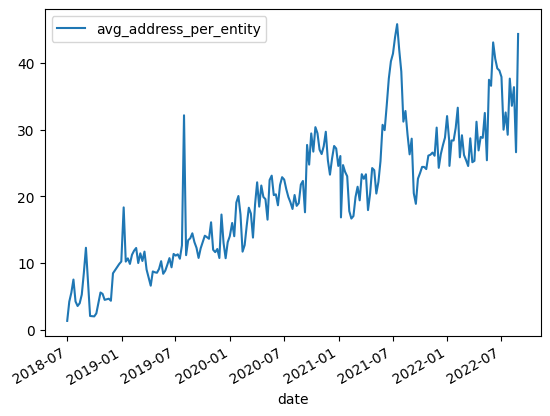

In [15]:
# Plot
fig2, ax2 = plt.subplots()
df.plot(x='date', y='avg_address_per_entity', ax=ax2)